In [1]:
import cv2
from ultralytics import YOLO
from matplotlib import pyplot as plt
import easyocr

after trying easyocr, pytesseract and keras-ocr, 
easyocr gives the best result but still need to improve

## here is the detected violation image

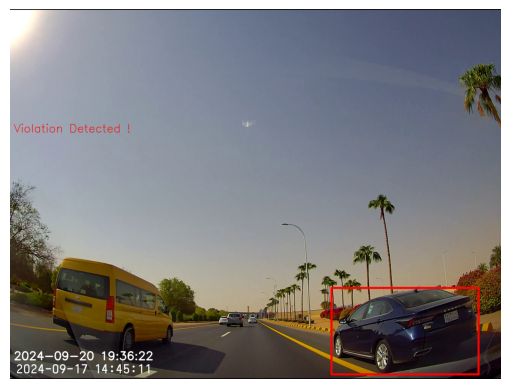

In [4]:
image = cv2.imread('../Data/violations_images/violation42.jpg')
plt.axis('off')
plt.imshow(image[:, :, ::-1]) 

## load the model from previous mini-project for accurate license plate detection

In [9]:
model = YOLO('../Models/ocr.pt')
results = model(image)


0: 512x640 2 License_Plates, 91.0ms
Speed: 7.7ms preprocess, 91.0ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


### crop the detected license plate within xyxy, to help OCR perform faster and more accurate


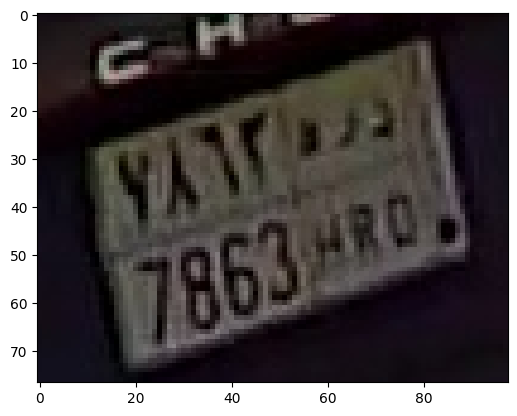

In [8]:
x1, y1, x2, y2 = results[0].boxes.xyxy[0]
cropped_img = image[int(y1):int(y2), int(x1):int(x2)]
# save cropped image
cv2.imwrite('./cropped_plate.jpg', cropped_img)
plt.imshow(cropped_img[:, :, ::-1])

In [17]:
# get the license plate text using easyocr
def easyOCR(frame):
    reader = easyocr.Reader(['en'], gpu=False, model_storage_directory='../Models')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    noise_flt = cv2.bilateralFilter(gray, 11, 17, 17)
    results = reader.readtext(noise_flt)
    return results

In [18]:
#HDR 7863, real license plate 
# Mrd, MT, 7862, ocr result
text = easyOCR(cropped_img)
for t in text:
    print(t[1], t[2])

Using CPU. Note: This module is much faster with a GPU.


Mrd 0.029565913551021623
MT 0.6322442284380365
7862 0.9050185084342957


### [official EasyOCR space](https://huggingface.co/spaces/tomofi/EasyOCR)
### tested the same image on the easyocr space on huggingface and the result was worse.
 

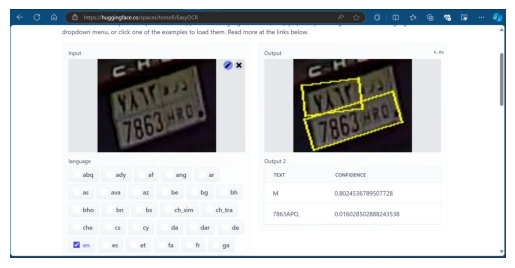

In [19]:
image = cv2.imread('../Data/Screenshot 2024-09-21 090106.png')
plt.axis('off')
plt.imshow(image[:, :, ::-1])